In [5]:
import pandas as pd

emissions = pd.read_csv(filepath_or_buffer="emissions.csv", encoding_errors='ignore')
production = pd.read_csv(filepath_or_buffer="Agriculture_Dataset_text.csv", encoding_errors='ignore')

is_europe = production['Area'] == "European Union (27)"

production = production[is_europe]

as_ghg_fraction = lambda product: f"{product} % of GHG emissions"
as_c02_emission = lambda product: f"{product}-Emissions (CO2eq)-kilotonnes"

products_raw = production.columns[2::2].map(lambda product: product.split("-Emissions")[0])

display(products_raw)

Index(['Cereals excluding rice', 'Eggs, hen, in shell', 'Meat, buffalo',
       'Meat, cattle', 'Meat, chicken', 'Meat, goat', 'Meat, pig',
       'Meat, sheep', 'Milk, whole fresh buffalo', 'Milk, whole fresh camel',
       'Milk, whole fresh cow', 'Milk, whole fresh goat',
       'Milk, whole fresh sheep', 'Rice, paddy'],
      dtype='object')

In [6]:
joined = (production
    .merge(emissions, left_on="Year", right_on="Year:text")
    .reindex(columns=[
        "Year", 
        *products_raw.map(as_c02_emission),
        "EU-28 (domestic target scope, including international aviation):number",
    ])
    )

joined = joined.rename(columns={
    "EU-28 (domestic target scope, including international aviation):number": "EU Emissions (C02eq)-kilotonnes"
})

# Convert to kilotonnes
joined["EU Emissions (C02eq)-kilotonnes"] = joined["EU Emissions (C02eq)-kilotonnes"].apply(lambda x: x * 1000)

display(joined)

,Year,Cereals excluding rice-Emissions (CO2eq)-kilotonnes,"Eggs, hen, in shell-Emissions (CO2eq)-kilotonnes","Meat, buffalo-Emissions (CO2eq)-kilotonnes","Meat, cattle-Emissions (CO2eq)-kilotonnes","Meat, chicken-Emissions (CO2eq)-kilotonnes","Meat, goat-Emissions (CO2eq)-kilotonnes","Meat, pig-Emissions (CO2eq)-kilotonnes","Meat, sheep-Emissions (CO2eq)-kilotonnes","Milk, whole fresh buffalo-Emissions (CO2eq)-kilotonnes","Milk, whole fresh camel-Emissions (CO2eq)-kilotonnes","Milk, whole fresh cow-Emissions (CO2eq)-kilotonnes","Milk, whole fresh goat-Emissions (CO2eq)-kilotonnes","Milk, whole fresh sheep-Emissions (CO2eq)-kilotonnes","Rice, paddy-Emissions (CO2eq)-kilotonnes",EU Emissions (C02eq)-kilotonnes
0,1990,49744.1483,4960.9045,113.4449,123291.9395,2307.7384,1421.8023,37570.6948,19205.4777,137.6600,NaN,116138.4367,1936.9254,9218.9069,10043.0296,5719570.0
1,1991,47168.6431,4599.8378,86.5338,120498.8710,2281.6859,1429.7279,37036.6591,18946.0310,136.3479,NaN,107901.3640,1911.4220,8854.6671,9294.2331,5620120.0
2,1992,43702.8456,4622.2211,80.7245,119709.9640,2342.1765,1350.2766,37226.7153,18374.3599,120.7945,NaN,110949.2649,1850.2645,8838.8098,8426.4346,5449730.0
3,1993,46270.7919,4593.6459,90.5011,118511.2466,2376.8677,1291.9099,37890.1090,17425.4241,143.1599,NaN,109674.0898,1875.9093,8644.6782,8337.1874,5353800.0
4,1994,47195.8123,4587.1797,85.3114,115923.7147,2305.3961,1303.9034,37555.4033,16391.0222,135.7517,NaN,106824.1647,1905.2780,8518.3293,8696.7601,5327910.0
5,1995,46443.7743,4521.3984,88.9367,114431.1330,2269.4409,1315.6488,37152.9367,15750.2079,139.5375,NaN,103808.3277,2010.2756,8517.1464,8492.6743,5386730.0
6,1996,49652.4543,4373.9620,90.0161,115473.5977,2683.1253,1273.3399,36613.5028,15306.3960,214.0378,NaN,101657.2446,1958.3230,8186.4503,9662.5755,5499670.0
7,1997,50093.3177,4415.9015,101.5884,115343.5111,2431.6176,1258.4317,36752.0001,15767.1940,201.6475,NaN,100153.2218,2052.3816,8003.8346,9374.3270,5403160.0
8,1998,50216.0126,4387.6702,87.6476,113151.7709,2510.3592,1276.0944,37109.2162,15636.9938,236.7627,NaN,97833.7300,2084.6874,8050.1953,9287.1404,5364140.0
9,1999,49208.6668,4489.0899,140.4292,112651.0144,2418.4073,1278.7466,38283.3753,15395.4288,255.3265,NaN,95602.1552,2062.2516,7872.8205,9185.4201,5264010.0


In [7]:
# Divide each product per total emissions
products_frc = products_raw.map(lambda product: f"{product} % of GHG emissions")

joined[as_c02_emission("Total")] = joined[products_raw.map(as_c02_emission)].sum(axis=1)
products_raw = products_raw.union(["Total"])

for product in products_raw:
    joined[as_ghg_fraction(product)] = (joined[as_c02_emission(product)] / joined["EU Emissions (C02eq)-kilotonnes"] * 100)

joined = joined.reindex(columns=[
        "Year", 
        *products_raw.map(as_ghg_fraction),
        "EU Emissions (C02eq)-kilotonnes",
    ])


display(joined)

,Year,Cereals excluding rice % of GHG emissions,"Eggs, hen, in shell % of GHG emissions","Meat, buffalo % of GHG emissions","Meat, cattle % of GHG emissions","Meat, chicken % of GHG emissions","Meat, goat % of GHG emissions","Meat, pig % of GHG emissions","Meat, sheep % of GHG emissions","Milk, whole fresh buffalo % of GHG emissions","Milk, whole fresh camel % of GHG emissions","Milk, whole fresh cow % of GHG emissions","Milk, whole fresh goat % of GHG emissions","Milk, whole fresh sheep % of GHG emissions","Rice, paddy % of GHG emissions",Total % of GHG emissions,EU Emissions (C02eq)-kilotonnes
0,1990,0.869718,0.086736,0.001983,2.155616,0.040348,0.024859,0.656880,0.335785,0.002407,NaN,2.030545,0.033865,0.161182,0.175591,6.575514,5719570.0
1,1991,0.839282,0.081846,0.001540,2.144062,0.040599,0.025439,0.659001,0.337111,0.002426,NaN,1.919912,0.034010,0.157553,0.165374,6.408155,5620120.0
2,1992,0.801927,0.084816,0.001481,2.196622,0.042978,0.024777,0.683093,0.337161,0.002217,NaN,2.035867,0.033951,0.162188,0.154621,6.561699,5449730.0
3,1993,0.864261,0.085802,0.001690,2.213591,0.044396,0.024131,0.707724,0.325478,0.002674,NaN,2.048528,0.035039,0.161468,0.155725,6.670505,5353800.0
4,1994,0.885822,0.086097,0.001601,2.175782,0.043270,0.024473,0.704881,0.307645,0.002548,NaN,2.004992,0.035760,0.159881,0.163230,6.595983,5327910.0
5,1995,0.862189,0.083936,0.001651,2.124315,0.042130,0.024424,0.689712,0.292389,0.002590,NaN,1.927112,0.037319,0.158113,0.157659,6.403541,5386730.0
6,1996,0.902826,0.079531,0.001637,2.099646,0.048787,0.023153,0.665740,0.278315,0.003892,NaN,1.848424,0.035608,0.148853,0.175694,6.312106,5499670.0
7,1997,0.927111,0.081728,0.001880,2.134742,0.045004,0.023291,0.680195,0.291814,0.003732,NaN,1.853605,0.037985,0.148132,0.173497,6.402716,5403160.0
8,1998,0.936143,0.081796,0.001634,2.109411,0.046799,0.023789,0.691802,0.291510,0.004414,NaN,1.823847,0.038863,0.150074,0.173134,6.373217,5364140.0
9,1999,0.934813,0.085279,0.002668,2.140023,0.045942,0.024292,0.727266,0.292466,0.004850,NaN,1.816147,0.039176,0.149559,0.174495,6.436977,5264010.0


In [8]:
year = joined.loc[joined["Year"] == 2016]
print("Data obtained for latest year (2016):")
display(year)

Data obtained for latest year (2016):


,Year,Cereals excluding rice % of GHG emissions,"Eggs, hen, in shell % of GHG emissions","Meat, buffalo % of GHG emissions","Meat, cattle % of GHG emissions","Meat, chicken % of GHG emissions","Meat, goat % of GHG emissions","Meat, pig % of GHG emissions","Meat, sheep % of GHG emissions","Milk, whole fresh buffalo % of GHG emissions","Milk, whole fresh camel % of GHG emissions","Milk, whole fresh cow % of GHG emissions","Milk, whole fresh goat % of GHG emissions","Milk, whole fresh sheep % of GHG emissions","Rice, paddy % of GHG emissions",Total % of GHG emissions,EU Emissions (C02eq)-kilotonnes
26,2016,1.13333,0.105176,0.006463,2.408109,0.065829,0.040958,0.800853,0.254597,0.010385,NaN,1.78654,0.031956,0.159495,0.205478,7.009169,4440780.0


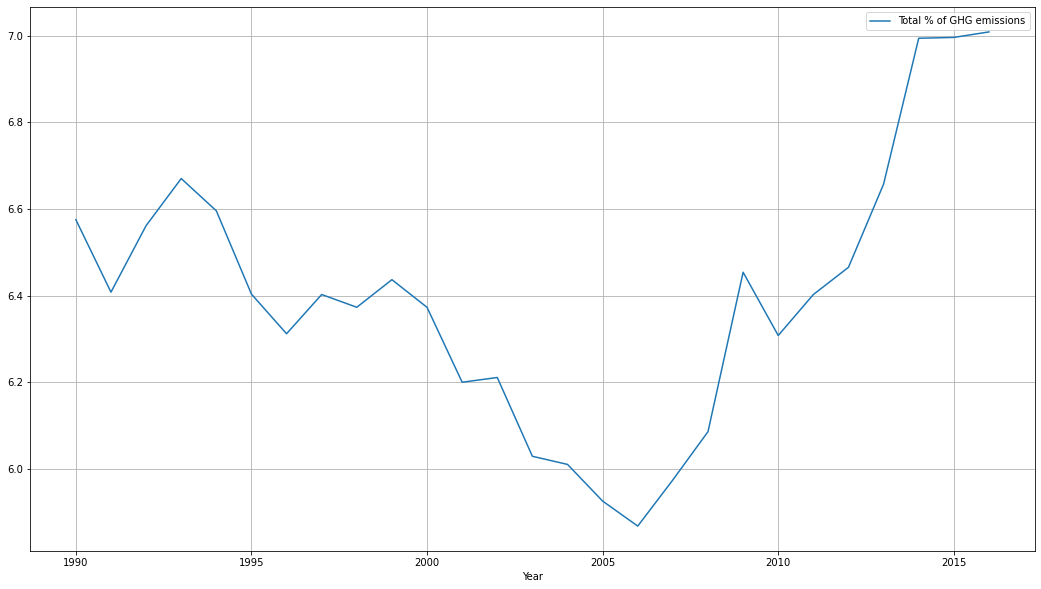

In [9]:
joined.plot(x="Year", y=as_ghg_fraction("Total"), figsize=(18, 10), grid=True)

data_ghg = joined.reindex([
    "Year", *products_raw.map(as_ghg_fraction)
])